In [1]:
from keras.datasets import imdb

(train_data, train_labels),(test_data, test_labels) = imdb.load_data(num_words = 10000)
word_index = imdb.get_word_index()

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decode_review = ' '.join(reverse_word_index.get(i - 3, '?') for i in train_data[0])

import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in  enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.array(train_labels).astype('float32')
y_test = np.array(test_labels).astype('float32')


/usr/lib/python3/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWar

In [22]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu',input_shape = (10000, )))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))


In [23]:
from keras.optimizers import RMSprop
from keras.losses import binary_crossentropy
#from keras import metrics

model.compile(optimizer = RMSprop(lr = 0.001),
              loss = binary_crossentropy,
              metrics = ['acc'])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 71us/step - loss: 0.5032 - acc: 0.7987 - val_loss: 0.3735 - val_acc: 0.8734
Epoch 2/20
15000/15000 [==============================] - 1s 53us/step - loss: 0.2985 - acc: 0.9051 - val_loss: 0.3013 - val_acc: 0.8877
Epoch 3/20
15000/15000 [==============================] - 1s 51us/step - loss: 0.2188 - acc: 0.9303 - val_loss: 0.2912 - val_acc: 0.8821
Epoch 4/20
15000/15000 [==============================] - 1s 52us/step - loss: 0.1741 - acc: 0.9448 - val_loss: 0.2755 - val_acc: 0.8898
Epoch 5/20
15000/15000 [==============================] - 1s 51us/step - loss: 0.1430 - acc: 0.9528 - val_loss: 0.2807 - val_acc: 0.8895
Epoch 6/20
15000/15000 [==============================] - 1s 51us/step - loss: 0.1147 - acc: 0.9653 - val_loss: 0.2929 - val_acc: 0.8866
Epoch 7/20
15000/15000 [==============================] - 1s 51us/step - loss: 0.0973 - acc: 0.9716 - val_loss: 0.3496 - val_acc

In [24]:
model2 = models.Sequential()
model2.add(layers.Dense(4, activation = 'relu',input_shape = (10000, )))
model2.add(layers.Dense(4, activation = 'relu'))
model2.add(layers.Dense(1, activation = 'sigmoid'))

In [25]:
model2.compile(optimizer = RMSprop(lr = 0.001),
              loss = binary_crossentropy,
              metrics = ['acc'])

history2 = model2.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 79us/step - loss: 0.5697 - acc: 0.7653 - val_loss: 0.4715 - val_acc: 0.8573
Epoch 2/20
15000/15000 [==============================] - 1s 54us/step - loss: 0.4030 - acc: 0.8890 - val_loss: 0.3840 - val_acc: 0.8760
Epoch 3/20
15000/15000 [==============================] - 1s 55us/step - loss: 0.3176 - acc: 0.9103 - val_loss: 0.3374 - val_acc: 0.8793
Epoch 4/20
15000/15000 [==============================] - 1s 55us/step - loss: 0.2636 - acc: 0.9240 - val_loss: 0.3068 - val_acc: 0.8863
Epoch 5/20
15000/15000 [==============================] - 1s 55us/step - loss: 0.2249 - acc: 0.9338 - val_loss: 0.2947 - val_acc: 0.8850
Epoch 6/20
15000/15000 [==============================] - 1s 54us/step - loss: 0.1978 - acc: 0.9433 - val_loss: 0.2821 - val_acc: 0.8900
Epoch 7/20
15000/15000 [==============================] - 1s 51us/step - loss: 0.1741 - acc: 0.9489 - val_loss: 0.2759 - val_acc

In [26]:
model3 = models.Sequential()
model3.add(layers.Dense(512, activation = 'relu',input_shape = (10000, )))
model3.add(layers.Dense(512, activation = 'relu'))
model3.add(layers.Dense(1, activation = 'sigmoid'))
model3.compile(optimizer = RMSprop(lr = 0.001),
              loss = binary_crossentropy,
              metrics = ['acc'])

history3 = model3.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 108us/step - loss: 0.5133 - acc: 0.7597 - val_loss: 1.0803 - val_acc: 0.6213
Epoch 2/20
15000/15000 [==============================] - 1s 79us/step - loss: 0.2716 - acc: 0.8933 - val_loss: 0.2823 - val_acc: 0.8851
Epoch 3/20
15000/15000 [==============================] - 1s 79us/step - loss: 0.1553 - acc: 0.9413 - val_loss: 0.2770 - val_acc: 0.8899
Epoch 4/20
15000/15000 [==============================] - 1s 79us/step - loss: 0.0911 - acc: 0.9701 - val_loss: 0.3854 - val_acc: 0.8789
Epoch 5/20
15000/15000 [==============================] - 1s 80us/step - loss: 0.0958 - acc: 0.9797 - val_loss: 0.3406 - val_acc: 0.8861
Epoch 6/20
15000/15000 [==============================] - 1s 82us/step - loss: 0.0042 - acc: 0.9996 - val_loss: 0.5156 - val_acc: 0.8827
Epoch 7/20
15000/15000 [==============================] - 1s 83us/step - loss: 5.5284e-04 - acc: 1.0000 - val_loss: 0.6635 - va

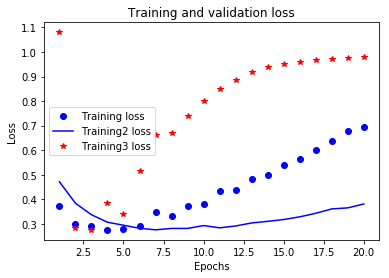

In [28]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

history2_dict = history2.history
loss2_values = history2_dict['loss']
val_loss2_values = history2_dict['val_loss']

history3_dict = history3.history
loss3_values = history3_dict['loss']
val_loss3_values = history3_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, val_loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss2_values, 'b', label = 'Training2 loss')
plt.plot(epochs, val_loss3_values, 'r*', label = 'Training3 loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()